# EDA BASE 1: Microdatos de Migración Colombia (2021)

In [3]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

In [4]:
base1 = pd.read_csv('Bases de Datos/Mauricio Ospina - Instituto Distrital Turismo_Reto Observatorio de Turismo_Mauricio Ospina/1. Microdatos de Migración Colombia (2021).csv', delimiter=';')
base1.shape

(121735, 22)

In [17]:
base1.head(3)

,Motivo Viaje,Centro Regional,Puesto Migratorio,Tipo Transporte,Ciudad Hospedaje,Entrada Salida,Meses1,País Nacionalidad,Rango Edad,Colombiano/Extranjero,Departamento Hospedaje,Region Nacionalidad,Año,Categoría Migratoria,Departamento1,País Destino Procedencia,Region Destino,Sexo1,Fac Exp,Fac Exp Femenino,Fac Exp Masculino,Número de registros
0,Turismo,Aeropuerto Eldorado,Aeropuerto Eldorado de Bogotá,Aéreo,Bogotá,Entradas,Septiembre,España,50-59,Extranjeros,Bogota D.C.,Europa,2021,Permiso de Turismo,Bogotá,España,Europa,Femenino,37,37,0,1
1,Especial de Paz,Aeropuerto Eldorado,Aeropuerto Eldorado de Bogotá,Aéreo,Bogotá,Entradas,Febrero,Argentina,50-59,Extranjeros,Bogota D.C.,América del Sur,2021,Visa Residencia,Bogotá,Argentina,América del Sur,Masculino,1,0,1,1
2,Tránsito,Aeropuerto Eldorado,Aeropuerto Eldorado de Bogotá,Aéreo,Bogotá,Entradas,Junio,México,30-39,Extranjeros,Bogota D.C.,América Central y el Caribe,2021,Permiso Otras Actividades,Bogotá,República Dominicana,América Central y el Caribe,Femenino,1,1,0,1


In [5]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121735 entries, 0 to 121734
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Motivo Viaje              121735 non-null  object
 1   Centro Regional           121735 non-null  object
 2   Puesto Migratorio         121735 non-null  object
 3   Tipo Transporte           121735 non-null  object
 4   Ciudad Hospedaje          121735 non-null  object
 5   Entrada Salida            121735 non-null  object
 6   Meses1                    121735 non-null  object
 7   País Nacionalidad         121735 non-null  object
 8   Rango Edad                121735 non-null  object
 9   Colombiano/Extranjero     121735 non-null  object
 10  Departamento Hospedaje    121735 non-null  object
 11  Region Nacionalidad       121735 non-null  object
 12  Año                       121735 non-null  int64 
 13  Categoría Migratoria      121735 non-null  object
 14  Depa

In [6]:
base1[['Fac Exp','Fac Exp Femenino','Fac Exp Masculino','Número de registros']].describe()

,Fac Exp,Fac Exp Femenino,Fac Exp Masculino,Número de registros
count,121735.000000,121735.000000,121735.000000,121735.0
mean,4.921929,2.045648,2.875722,1.0
std,28.551459,16.839655,23.310561,0.0
min,1.000000,0.000000,0.000000,1.0
25%,1.000000,0.000000,0.000000,1.0
50%,1.000000,0.000000,1.000000,1.0
75%,2.000000,1.000000,1.000000,1.0
max,1877.000000,1736.000000,1877.000000,1.0


In [5]:
base1[['Motivo Viaje','Centro Regional','Puesto Migratorio','Tipo Transporte','Ciudad Hospedaje','Entrada Salida'
       ,'Meses1','País Nacionalidad','Rango Edad','Colombiano/Extranjero','Departamento Hospedaje'
       ,'Region Nacionalidad','Categoría Migratoria','Departamento1','País Destino Procedencia'
       ,'Region Destino','Sexo1']].describe()

,Motivo Viaje,Centro Regional,Puesto Migratorio,Tipo Transporte,Ciudad Hospedaje,Entrada Salida,Meses1,País Nacionalidad,Rango Edad,Colombiano/Extranjero,Departamento Hospedaje,Region Nacionalidad,Categoría Migratoria,Departamento1,País Destino Procedencia,Region Destino,Sexo1
count,121735,121735,121735,121735,121735,121735,121735,121735,121735,121735,121735,121735,121735,121735,121735,121735,121735
unique,42,12,27,4,1,1,12,179,7,1,1,8,21,18,191,8,3
top,Turismo,Aeropuerto Eldorado,Aeropuerto Eldorado de Bogotá,Aéreo,Bogotá,Entradas,Diciembre,Venezuela,30-39,Extranjeros,Bogota D.C.,América del Sur,Permiso de Turismo,Bogotá,Estados Unidos,América Central y el Caribe,Masculino
freq,40140,112486,112486,117033,121735,121735,15481,15453,30654,121735,121735,41770,52291,112486,19718,39122,72305


In [19]:
base1.groupby(["Motivo Viaje"])["Motivo Viaje"].count().sort_values(ascending=False).head(10)

Motivo Viaje
Turismo               40140
Tránsito              16112
Negocios               9971
Trabajo                8963
Residente              7300
Tripulación            4957
Eventos                4817
Estudios               3856
Vínculo Marital        2604
Tratamiento Médico     2530
Name: Motivo Viaje, dtype: int64

<AxesSubplot:ylabel='Motivo Viaje'>

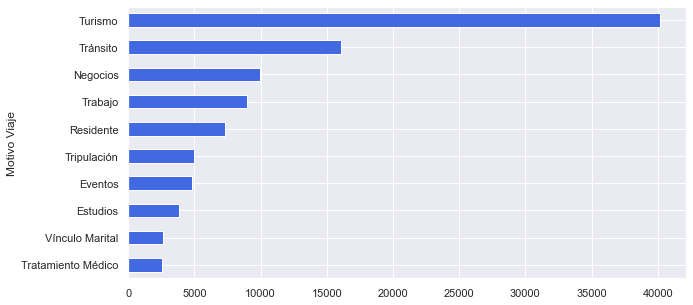

In [23]:
base1.groupby(["Motivo Viaje"])["Motivo Viaje"].count().sort_values(ascending=True).tail(10).plot.barh(
                                                              title=False,
                                                                color="royalblue",
                                                                figsize= (10,5))

<AxesSubplot:ylabel='País Nacionalidad'>

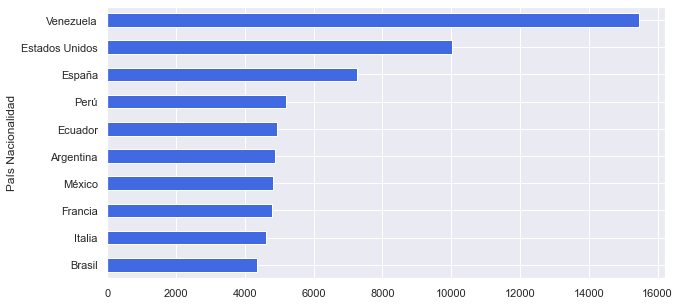

In [24]:
base1.groupby(['País Nacionalidad'])['País Nacionalidad'].count().sort_values(ascending=True).tail(10).plot.barh(
                                                              title=False,
                                                                color="royalblue",
                                                                figsize= (10,5))

<AxesSubplot:ylabel='País Nacionalidad'>

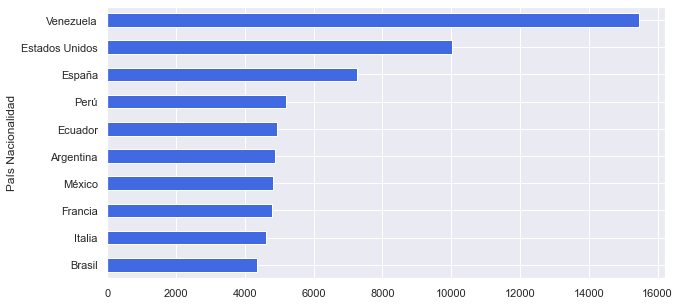

In [32]:
base1.groupby(['País Nacionalidad'])['País Nacionalidad'].count().sort_values(ascending=True).tail(10).plot.barh(
                                                              title=False,
                                                                color="royalblue",
                                                                figsize= (10,5))

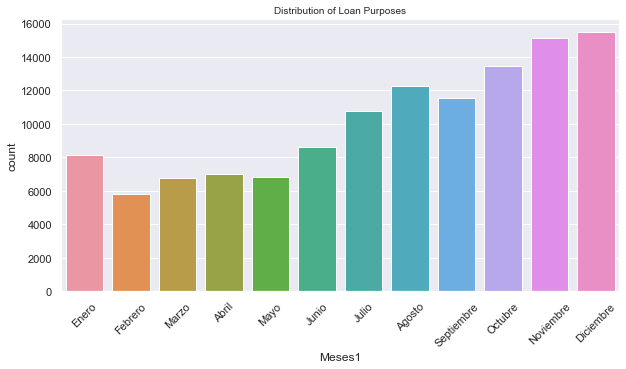

In [63]:
plt.figure(figsize= (10,5))
base1.Meses1.value_counts()
colors = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
MonthOrder = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
#sns.countplot(x='Meses1', order=base1['Meses1'].value_counts().index, data = base1) 
sns.countplot(x='Meses1', order=MonthOrder, data = base1) 
plt.xticks(rotation=45)
plt.title("Distribution of Loan Purposes", fontsize=10);

<AxesSubplot:xlabel='Meses1'>

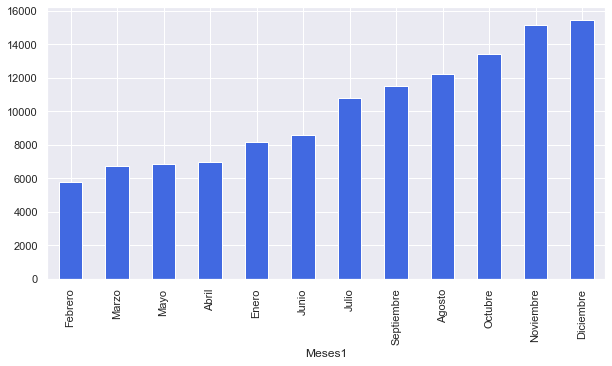

In [6]:
base1.groupby(['Meses1'])['Meses1'].count().sort_values(ascending=True).plot.bar(title=False,color="royalblue",figsize= (10,5))

<AxesSubplot:ylabel='Rango Edad'>

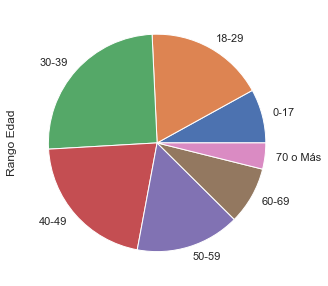

In [47]:
base1.groupby(['Rango Edad'])['Rango Edad'].count().plot.pie(title=False,figsize= (10,5))